## <center>  📊 Result History Analysis Report 📊 <center>

---

#### **Introduction**
This report provides an in-depth analysis of a dataset comprising 224,162 entries across six columns. The dataset includes valuable information related to departmental codes, student IDs, academic years, sessions, GPAs, and cumulative GPAs (T_CGPA). The purpose of this analysis is to uncover trends, patterns, and insights that can enhance decision-making processes and contribute to a deeper understanding of academic performance.

#### **Dataset Overview**
- **Total Entries**: 224,162
- **Columns**: 6
  - **Dep_Code**: Departmental code for each entry (object type)
  - **ID**: Unique identifier for each student (object type)
  - **Year**: Academic year associated with the entry (integer type)
  - **Session**: Session name or identifier (object type)
  - **GPA**: Grade Point Average for the respective entry (float type)
  - **T_CGPA**: Cumulative Grade Point Average till the respective session (float type)

#### **Objective** 🎯
The primary goal of this analysis is to thoroughly explore the dataset, uncovering trends, patterns, and insights that can drive informed decision-making. Various data visualization and analysis techniques will be employed to present a clear, concise, and visually appealing report.

#### **Structure of the Report**
1. **Data Cleaning and Preprocessing** 🧹:
   - **Objective**: Ensure the dataset is ready for analysis.
   - **Tasks**: Handle missing values, remove duplicates, and convert data types as necessary.

2. **Exploratory Data Analysis (EDA)** 🔍:
   - **Objective**: Investigate the dataset to identify trends and relationships.
   - **Methods**: Visualizations and summary statistics to understand data distributions and patterns.

3. **Advanced Analysis** 📈:
   - **Objective**: Perform deeper analyses to uncover intricate details.
   - **Tasks**: Analyze correlations, GPA distributions, T_CGPA trends, and other relevant metrics.

4. **Conclusion** 📝:
   - **Objective**: Summarize key findings and potential implications of the analysis.

Let's start by examining and preparing the dataset for a comprehensive analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Set pastel color palette
sns.set_palette("pastel")
sns.set(style="whitegrid")

## Let's Import our dataset

In [3]:
df = pd.read_csv('Datasets/result_data_new.csv')

In [4]:
# see what inside it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224162 entries, 0 to 224161
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Dep_Code  224162 non-null  object 
 1   ID        224162 non-null  object 
 2   Year      224162 non-null  int64  
 3   Session   224162 non-null  object 
 4   GPA       224162 non-null  float64
 5   T_CGPA    224162 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.3+ MB


In [5]:
df.head()

,Dep_Code,ID,Year,Session,GPA,T_CGPA
0,0yUDaOY,cract5ibeadumfm7do80,2020,8to9gg,0.50,2.38
1,0yUDaOY,cract5ibeadumfm7do80,2020,tkhm7o,3.44,3.13
2,0yUDaOY,cract5ibeadumfm7do80,2019,4jlh6g,2.67,2.67
3,WSPgLhc,cracsb2beaduec4jkgn0,2024,tkhm7o,3.85,3.28
4,WSPgLhc,cracsb2beaduec4jkgn0,2023,4jlh6g,2.67,3.15


In [6]:
# Is there any missing values?
df["Year"].min()

2003

## Start Analysis

### <center>Trend Analysis Over Years - Line Plot <center>

The visualization presents a line plot that tracks the progression of GPA and T_CGPA over multiple years. By plotting these two metrics on the same graph, it allows for an easy comparison of yearly academic performance (GPA) against cumulative performance (T_CGPA). The use of different colors for each line helps to clearly distinguish between the two metrics.

The plot is informative for understanding how students' academic achievements evolve over time. For instance, if both lines are closely aligned, it suggests consistency between annual performance and cumulative results. On the other hand, any divergence might indicate specific years where students either underperformed or overperformed relative to their overall academic trajectory.

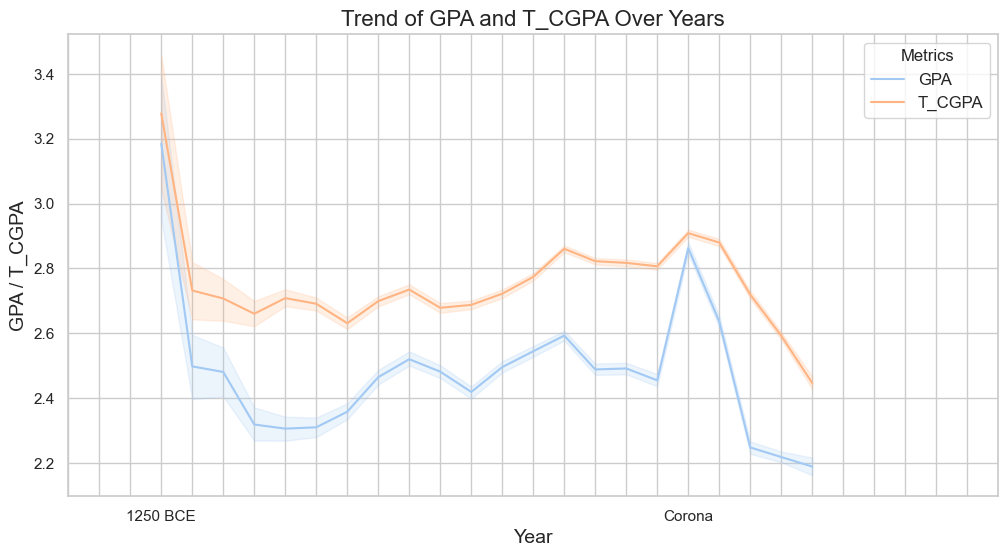

In [7]:
# Define the mapping of years to custom labels
year_replacements = {
    2003: '1250 BCE',
    2020: 'Corona'
}

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GPA', data=df, label='GPA', color=sns.color_palette("pastel")[0])
sns.lineplot(x='Year', y='T_CGPA', data=df, label='T_CGPA', color=sns.color_palette("pastel")[1])

# Set x-axis range from 2000 to 2030
plt.xlim(2000, 2030)

# Generate a list of years from 2000 to 2030
years_range = list(range(2000, 2031))

# Create custom labels with replacements only for specific years
custom_labels = [year_replacements.get(year, '') for year in years_range]

# Set ticks and labels on the x-axis
plt.xticks(ticks=years_range, labels=custom_labels)

plt.title('Trend of GPA and T_CGPA Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GPA / T_CGPA', fontsize=14)
plt.legend(title='Metrics', fontsize=12)
plt.grid(True)

# Save the plot as SVG
plt.savefig('Trend_Analysis_Over_Years.svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

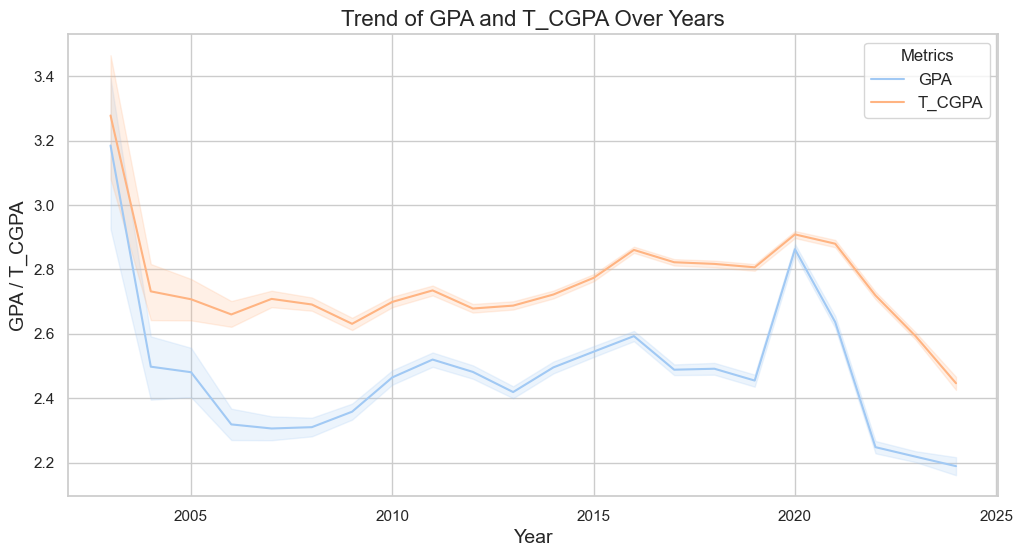

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GPA', data=df, label='GPA', color=sns.color_palette("pastel")[0])
sns.lineplot(x='Year', y='T_CGPA', data=df, label='T_CGPA', color=sns.color_palette("pastel")[1])
plt.title('Trend of GPA and T_CGPA Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GPA / T_CGPA', fontsize=14)
plt.legend(title='Metrics', fontsize=12)
plt.grid(True)
plt.show()

### <center>Distribution of GPA and T_CGPA - Histogram & KDE Plot<center>

This visualization displays the distribution of GPA and T_CGPA using overlapping histograms with Kernel Density Estimates (KDE). By plotting these distributions on the same graph, it allows for a clear comparison of how GPA and T_CGPA values are spread across the dataset.

The purple histogram represents the GPA distribution, while the orange histogram represents the T_CGPA distribution. The use of density as the y-axis helps to normalize the data, making it easier to compare the relative frequency of GPA and T_CGPA values, even if the number of observations for each differs.

Key insights that can be drawn from this plot include:

1. **Distribution Shape**:
   - The shape of each distribution (e.g., whether it is skewed, bimodal, or normal) can reveal important characteristics about the data, such as whether most students cluster around certain GPA or T_CGPA values.

2. **Central Tendency**:
   - The peak of each histogram indicates the most common GPA and T_CGPA values, providing insight into the typical academic performance within the dataset.

3. **Spread and Variability**:
   - The width of the distributions indicates how varied the GPA and T_CGPA values are. A wider distribution suggests greater variability among students' academic performance.

4. **Comparative Analysis**:
   - By comparing the two distributions, one can observe how closely GPA and T_CGPA align. If they overlap significantly, it suggests that annual performance closely mirrors cumulative performance. Differences between the two may highlight discrepancies that could be worth investigating.


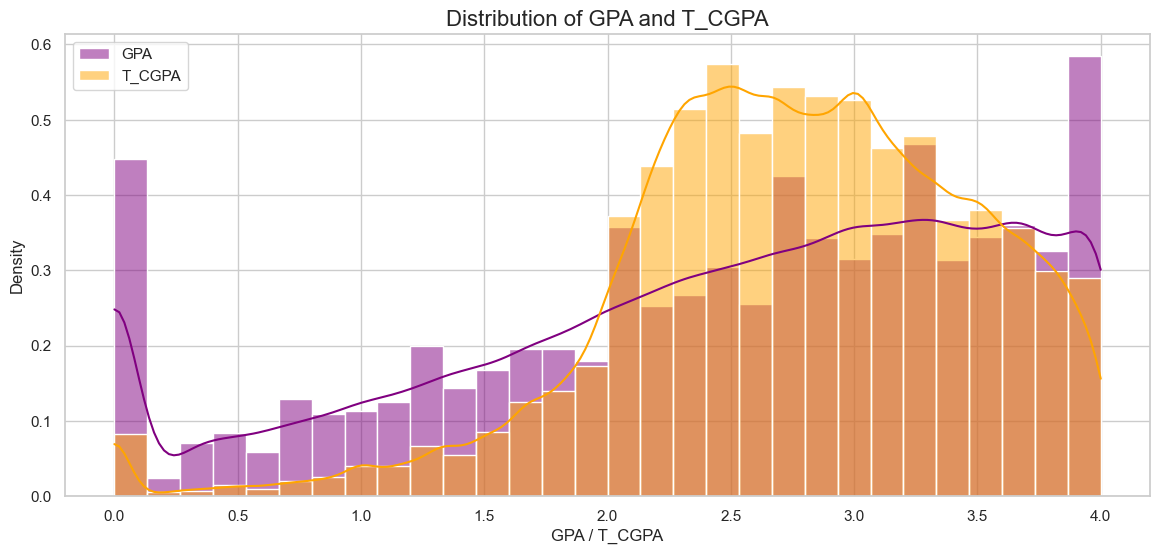

In [9]:
plt.figure(figsize=(14, 6))
sns.histplot(df['GPA'], kde=True, color='purple', bins=30, label='GPA', stat='density')
sns.histplot(df['T_CGPA'], kde=True, color='orange', bins=30, label='T_CGPA', stat='density')
plt.title('Distribution of GPA and T_CGPA', fontsize=16)
plt.xlabel('GPA / T_CGPA')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('Distributionof_GPA_and_T_CGPA.svg', dpi=300, bbox_inches='tight')
plt.show()

### <center>Correlation Analysis - Heatmap<center>

This visualization showcases a heatmap representing the correlation matrix between numerical variables, specifically Year, GPA, and T_CGPA. The heatmap is color-coded to illustrate the strength and direction of correlations between these variables, with annotations displaying the exact correlation coefficients.

Key insights from this visualization include:

1. **Correlation Strength and Direction**:
   - The heatmap allows for quick identification of how strongly the variables are correlated with each other. Positive correlations are indicated by colors on one end of the spectrum, while negative correlations are shown on the opposite end. The intensity of the color signifies the strength of the correlation.

2. **Relationships Between Variables**:
   - By analyzing the correlation coefficients, one can understand how changes in one variable are associated with changes in another. For instance, a high positive correlation between GPA and T_CGPA would suggest that as students' annual GPA increases, their cumulative GPA also increases proportionally.

3. **Potential Multicollinearity**:
   - If the correlation between variables is extremely high (close to 1 or -1), it might indicate multicollinearity, which could be important when considering predictive models or regression analysis.

4. **Insight into Academic Trends**:
   - The correlation between Year and GPA/T_CGPA can reveal whether academic performance is improving, declining, or remaining stable over time. For instance, a positive correlation between Year and GPA would suggest an upward trend in annual academic performance.

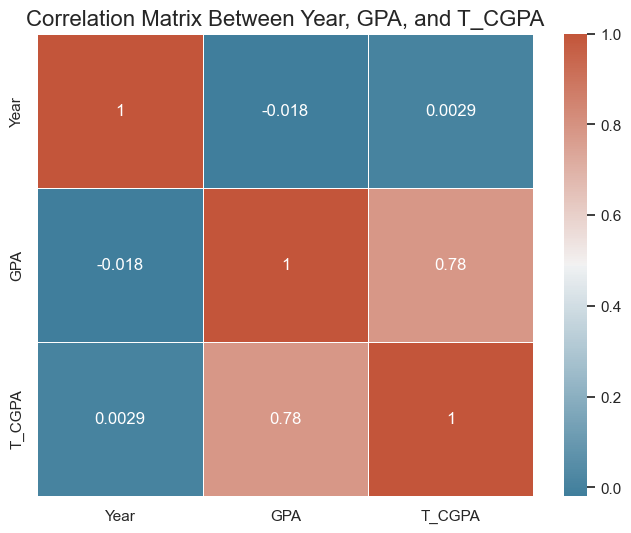

In [10]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5)
plt.title('Correlation Matrix Between Year, GPA, and T_CGPA', fontsize=16)
plt.savefig('Correlation_Analysis.svg', dpi=300, bbox_inches='tight')
plt.show()

### <center>GPA Distribution by Year - Box Plot<center>

This visualization displays a boxplot of GPA distribution across different years. The boxplot provides a clear summary of the central tendency, variability, and distribution of GPA for each year, allowing for a year-by-year comparison.

Key insights from this visualization include:

1. **Central Tendency**:
   - The median GPA for each year is indicated by the line within each box. This provides a quick understanding of the typical academic performance for that year.

2. **Variability and Spread**:
   - The height of each box represents the interquartile range (IQR), showing the middle 50% of the GPA values. A taller box suggests greater variability in GPAs within that year, while a shorter box indicates more consistent academic performance.

3. **Outliers**:
   - Outliers, represented by individual points outside the whiskers, highlight students whose GPA significantly deviates from the norm. This could signal exceptional performance or the need for academic support.

4. **Yearly Trends**:
   - By comparing the medians and the overall spread across years, one can observe trends in academic performance. For example, if the median GPA is consistently increasing, it may indicate an improvement in academic standards or student performance over time.

5. **Skewness**:
   - The position of the median line within the box and the length of the whiskers can indicate skewness in the GPA distribution. If the median is closer to the bottom or top of the box, it suggests a skewed distribution, which might indicate that most students are either performing below or above the average GPA.

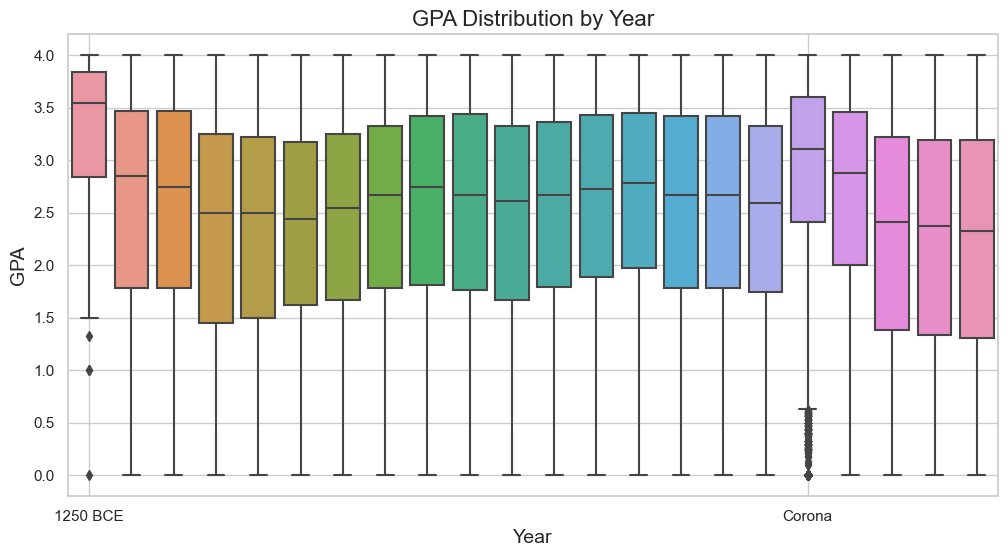

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping of years to custom labels
year_replacements = {
    2003: '1250 BCE',
    2020: 'Corona'
}

# Filter the data to include only the years within the range
filtered_df = df[df['Year'].between(2000, 2030)]

# Create the box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Year', y='GPA', data=filtered_df)

# Get the current tick locations and labels
tick_locations = ax.get_xticks()
tick_labels = [int(tick) for tick in tick_locations]  # Convert to integer

# Create custom labels
custom_labels = [year_replacements.get(year, str(year)) for year in tick_labels]

# Set the new custom labels on the x-axis
ax.set_xticks(tick_locations)  # Ensure we use the same tick locations
ax.set_xticklabels(custom_labels)

plt.title('GPA Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.grid(True)
plt.xticks(ticks=[0, 17], labels=['1250 BCE', 'Corona'])
plt.savefig('GPA_Distribution_by_Year.svg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


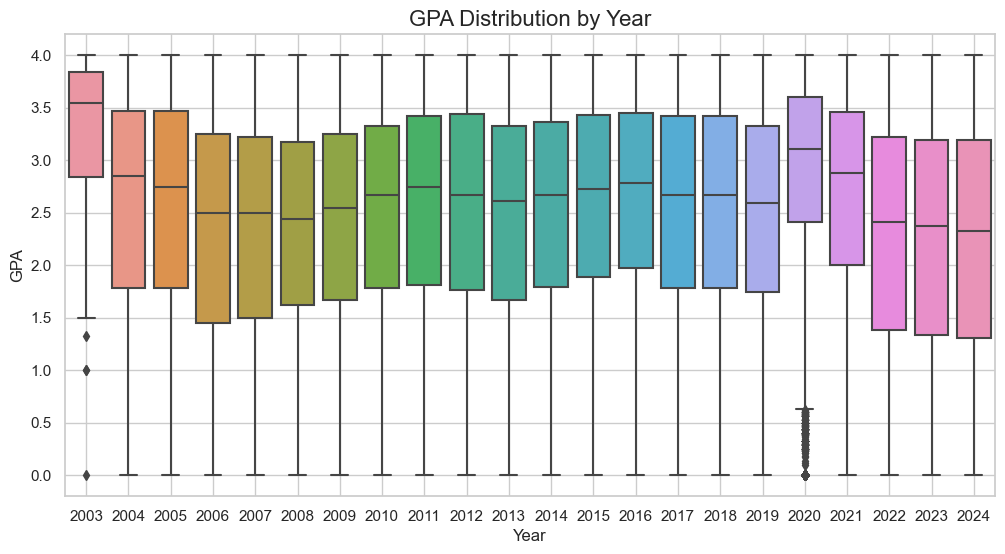

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='GPA', data=df)
plt.title('GPA Distribution by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

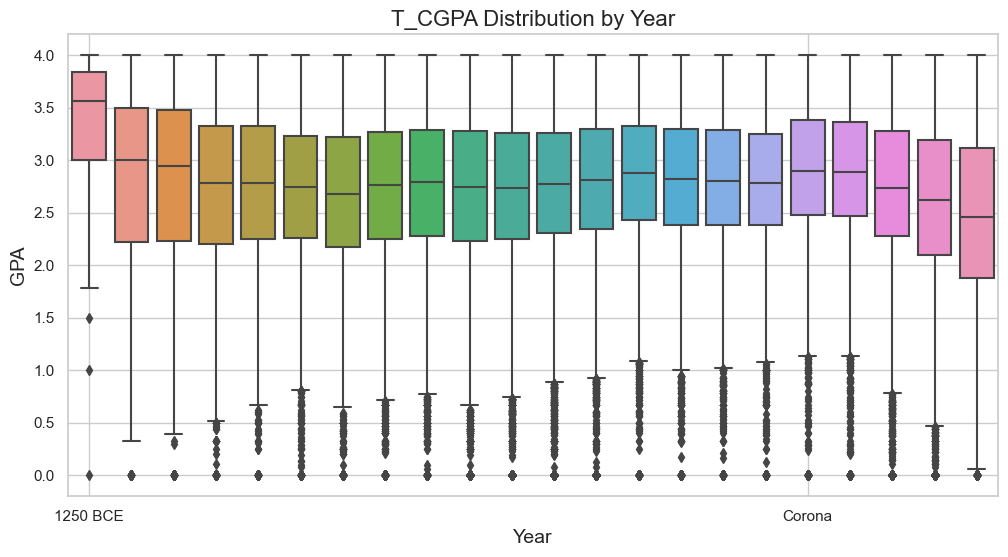

In [13]:
# Define the mapping of years to custom labels
year_replacements = {
    2003: '1250 BCE',
    2020: 'Corona'
}

# Filter the data to include only the years within the range
filtered_df = df[df['Year'].between(2000, 2030)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='T_CGPA', data=df)

# Get the current tick locations and labels
tick_locations = ax.get_xticks()
tick_labels = [int(tick) for tick in tick_locations]  # Convert to integer

# Create custom labels
custom_labels = [year_replacements.get(year, str(year)) for year in tick_labels]

# Set the new custom labels on the x-axis
ax.set_xticks(tick_locations)  # Ensure we use the same tick locations
ax.set_xticklabels(custom_labels)

plt.title('T_CGPA Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.grid(True)
plt.xticks(ticks=[0, 17], labels=['1250 BCE', 'Corona'])
plt.savefig('T_CGPA_Distribution_by_Year.svg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### T_GPA Distribution by Year - Box Plot

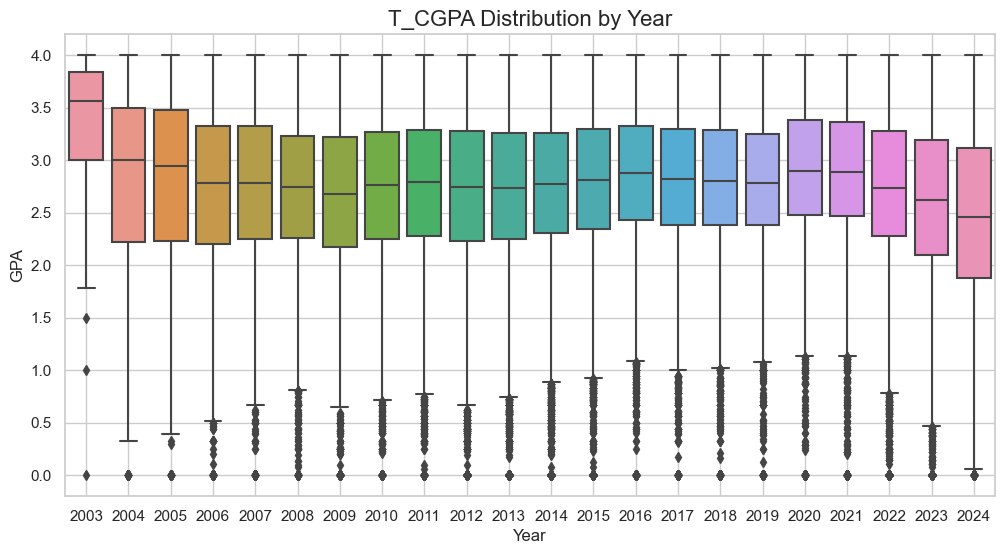

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='T_CGPA', data=df)
plt.title('T_CGPA Distribution by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

## <center>Session/Department wise Analysis<center>

This visualization presents two boxplots stacked vertically to compare the distribution of GPA and T_CGPA across different sessions. The use of separate plots allows for detailed examination of how each metric varies by session.

Key insights from this visualization include:

1. **GPA Distribution by Session**:
   - **Central Tendency**: The median GPA for each session is indicated by the line within the box, showing typical performance across sessions.
   - **Variability**: The spread of each box (IQR) reveals the range of GPAs within each session. Wider boxes suggest greater variability, while narrower boxes indicate more consistency.
   - **Outliers**: Individual points outside the whiskers highlight outliers with GPAs significantly different from the norm. These outliers can be further analyzed to understand exceptional or concerning performance.

2. **T_CGPA Distribution by Session**:
   - **Central Tendency**: The median T_CGPA for each session is similarly represented, providing insight into cumulative performance.
   - **Variability**: The height of the boxes shows the variability in T_CGPA within sessions. This helps in understanding how cumulative performance varies across different sessions.
   - **Outliers**: Outliers in T_CGPA, like in GPA, point to students with unusually high or low cumulative performance.

3. **Session Comparison**:
   - **Performance Trends**: By comparing the GPA and T_CGPA distributions, you can assess whether performance trends are consistent across sessions or if there are discrepancies between annual and cumulative achievements.
   - **Session-Specific Insights**: Identifying patterns or anomalies in specific sessions can highlight periods of exceptional performance or concern, providing a basis for targeted academic support or further investigation.

4. **Visual Clarity**:
   - The `coolwarm` palette helps distinguish between different sessions and makes the visual comparison of distributions more intuitive. The rotated x-axis labels improve readability for sessions with long names or numerous categories.

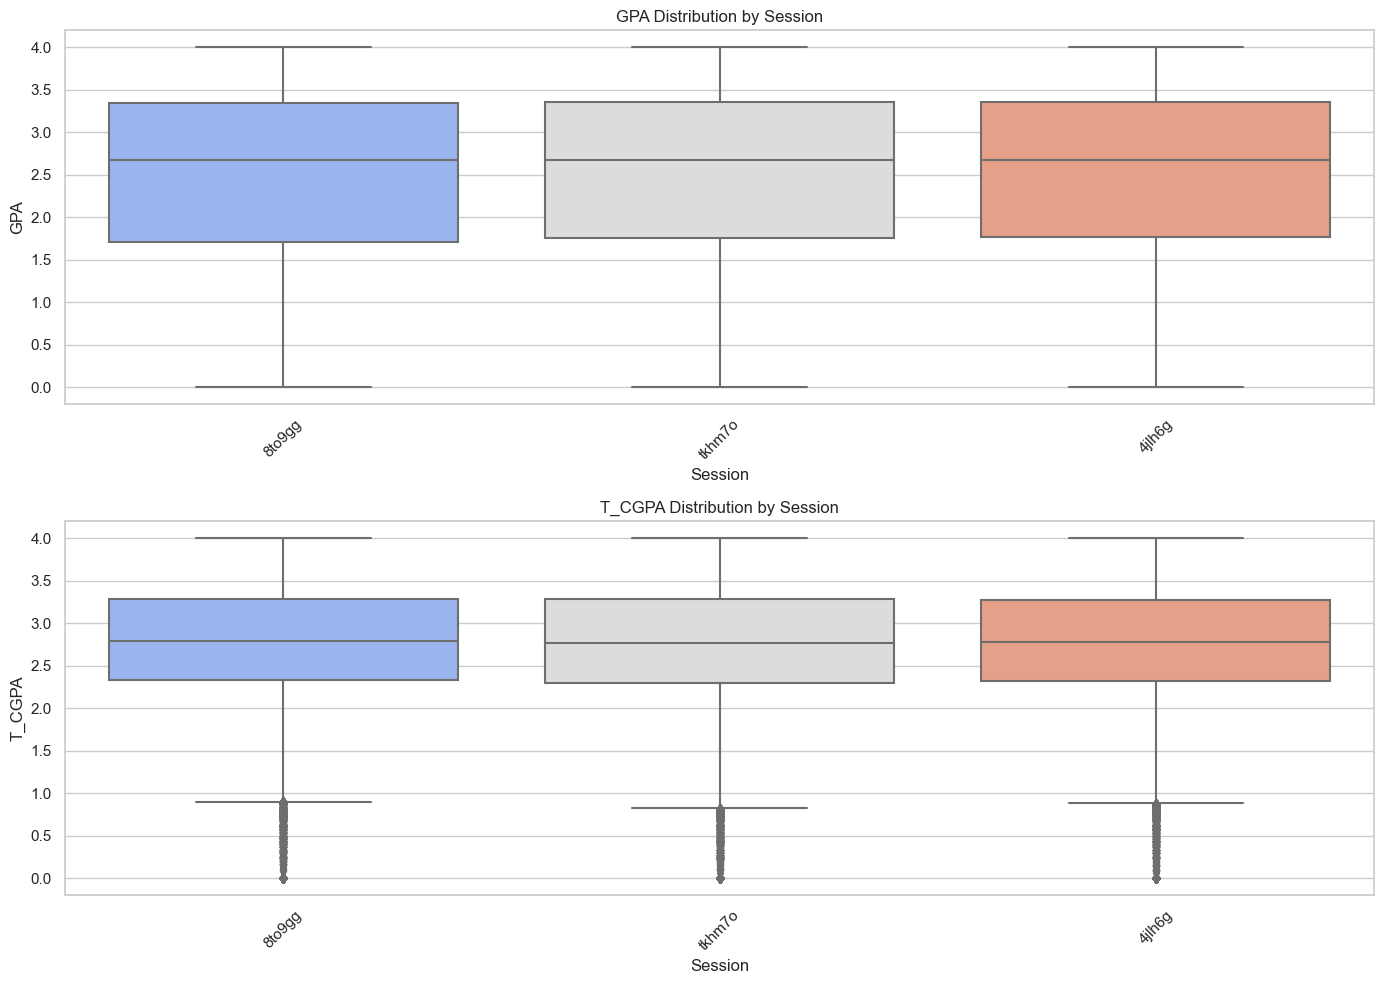

In [15]:
plt.figure(figsize=(14, 10))

# GPA by Session
plt.subplot(2, 1, 1)
sns.boxplot(x='Session', y='GPA', data=df, palette='coolwarm')
plt.title('GPA Distribution by Session')
plt.xlabel('Session')
plt.ylabel('GPA')
plt.xticks(rotation=45)

# T_CGPA by Session
plt.subplot(2, 1, 2)
sns.boxplot(x='Session', y='T_CGPA', data=df, palette='coolwarm')
plt.title('T_CGPA Distribution by Session')
plt.xlabel('Session')
plt.ylabel('T_CGPA')
plt.xticks(rotation=45)
plt.savefig('Session_wise_Analysis.png', dpi=300)

plt.tight_layout()
plt.show()

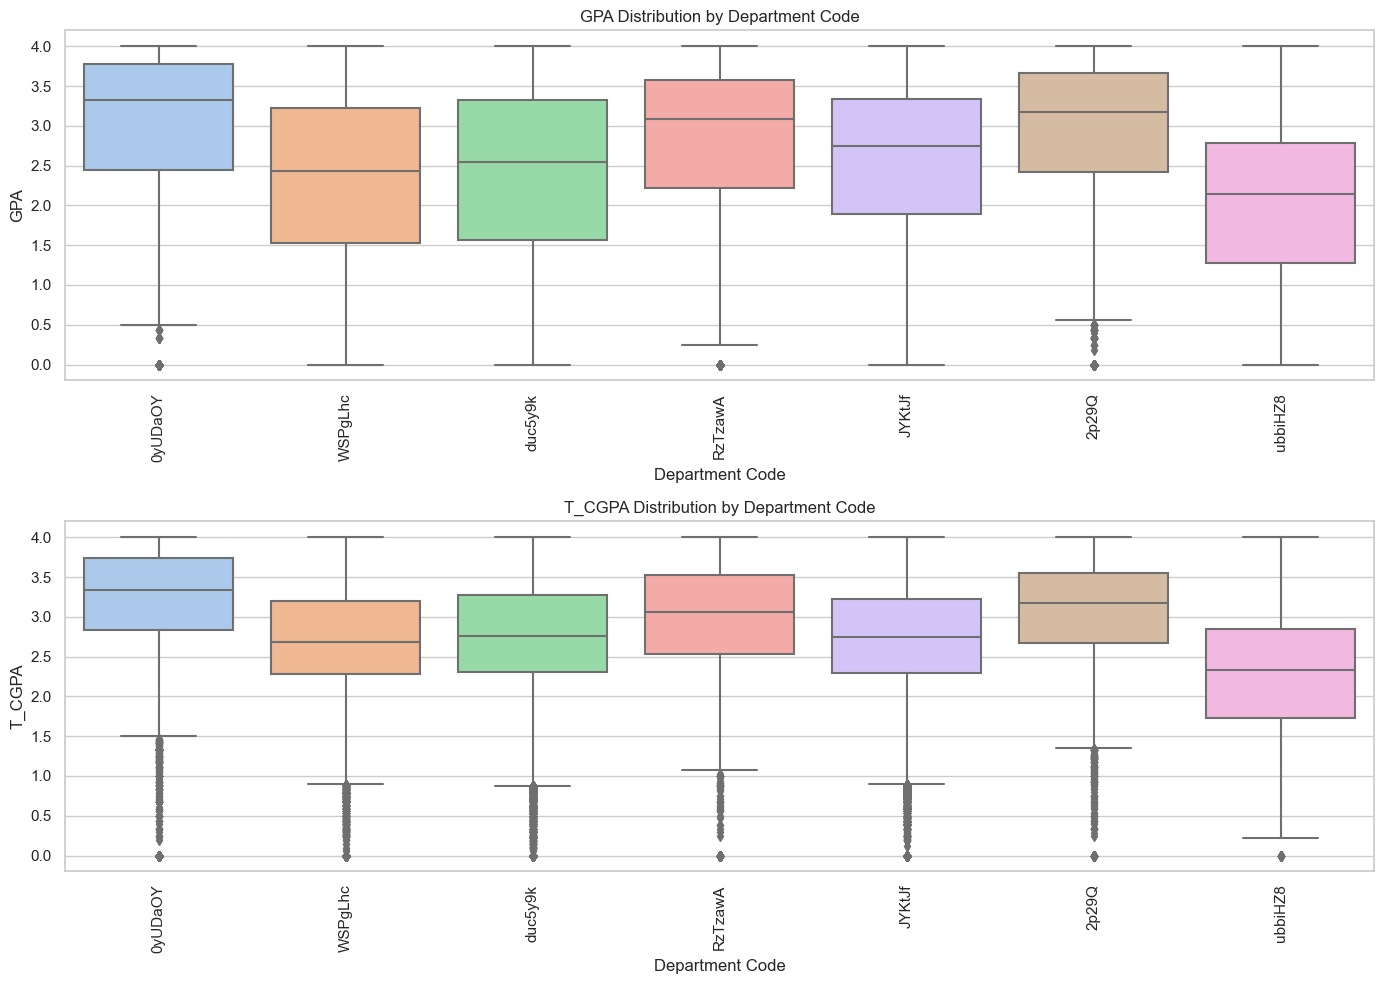

In [16]:
plt.figure(figsize=(14, 10))

# GPA by Department Code
plt.subplot(2, 1, 1)
sns.boxplot(x='Dep_Code', y='GPA', data=df, palette='pastel')
plt.title('GPA Distribution by Department Code')
plt.xlabel('Department Code')
plt.ylabel('GPA')
plt.xticks(rotation=90)

# T_CGPA by Department Code
plt.subplot(2, 1, 2)
sns.boxplot(x='Dep_Code', y='T_CGPA', data=df, palette='pastel')
plt.title('T_CGPA Distribution by Department Code')
plt.xlabel('Department Code')
plt.ylabel('T_CGPA')
plt.xticks(rotation=90)
plt.savefig('Department_wise_Analysis.png', dpi=300)

plt.tight_layout()
plt.show()

## <center>Department-wise Analysis<center>

This visualization consists of two bar plots displayed vertically to compare the average GPA and T_CGPA across different departments. Each bar plot offers a clear view of departmental performance metrics, making it easy to identify variations and trends.

Key insights from this visualization include:

1. **Average GPA by Department**:
   - **Departmental Performance**: The bar plot illustrates the average GPA for each department, allowing for a straightforward comparison of academic performance across different departments. 
   - **Departmental Differences**: Departments with higher bars have higher average GPAs, suggesting better overall academic performance. Conversely, lower bars indicate departments where students have lower average GPAs.
   - **Visual Clarity**: The `viridis` color palette enhances the readability of the bars, while the rotated x-axis labels ensure clear identification of departments, especially if there are many or they have long names.

2. **Average T_CGPA by Department**:
   - **Cumulative Performance**: This plot shows the average cumulative GPA (T_CGPA) for each department. It provides insights into how students’ cumulative academic performance differs by department.
   - **Departmental Comparisons**: Similar to the GPA plot, departments with higher bars indicate higher average T_CGPA, reflecting better cumulative performance. Lower bars suggest lower overall academic achievements.
   - **Consistency Check**: Comparing the average GPA and T_CGPA plots can help determine if departments with high average GPAs also have high average T_CGPA, or if there are discrepancies that might warrant further investigation.

3. **Department-Specific Insights**:
   - **Performance Trends**: Departments with consistently high or low average scores might have particular strengths or challenges that could be explored further to understand underlying causes.
   - **Benchmarking**: These plots can serve as benchmarks for academic performance, helping to identify departments that may need additional resources or support.

4. **Visual Representation**:
   - **Color Palette**: The `viridis` palette is used for visual appeal and clarity, with color gradients helping to distinguish between different performance levels.
   - **Layout**: The side-by-side layout allows for direct comparison of GPA and T_CGPA, facilitating a comprehensive understanding of departmental performance across different metrics.

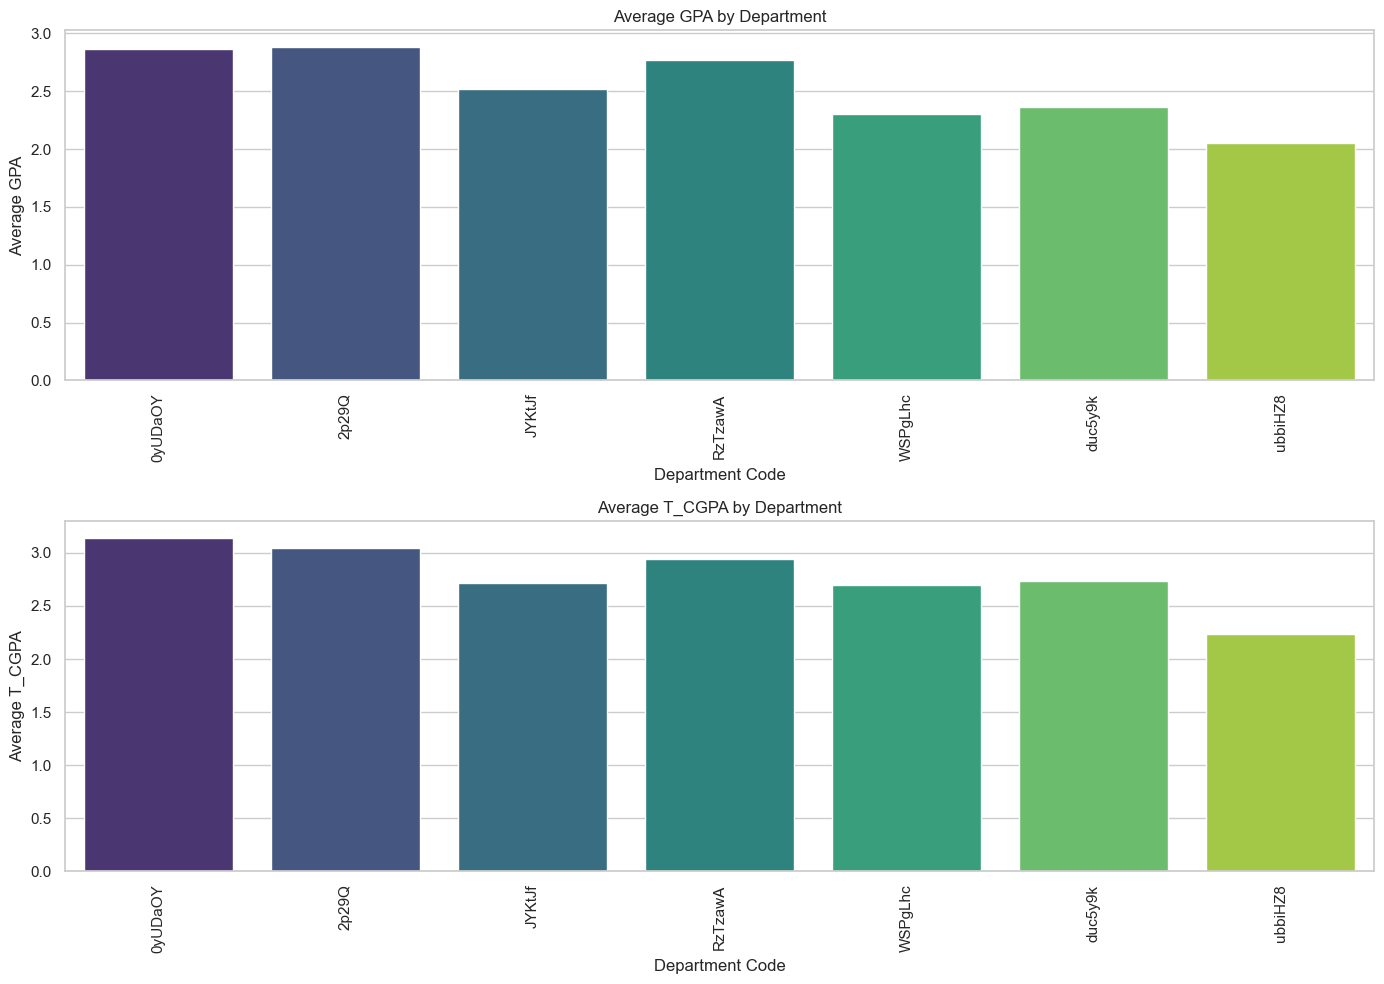

In [17]:
avg_gpa_cgpa = df.groupby('Dep_Code')[['GPA', 'T_CGPA']].mean().reset_index()

plt.figure(figsize=(14, 10))

# Average GPA by Department
plt.subplot(2, 1, 1)
sns.barplot(x='Dep_Code', y='GPA', data=avg_gpa_cgpa, palette='viridis')
plt.title('Average GPA by Department')
plt.xlabel('Department Code')
plt.ylabel('Average GPA')
plt.xticks(rotation=90)

# Average T_CGPA by Department
plt.subplot(2, 1, 2)
sns.barplot(x='Dep_Code', y='T_CGPA', data=avg_gpa_cgpa, palette='viridis')
plt.title('Average T_CGPA by Department')
plt.xlabel('Department Code')
plt.ylabel('Average T_CGPA')
plt.xticks(rotation=90)
plt.savefig('Department_wise_Bar.png', dpi=300)

plt.tight_layout()
plt.show()

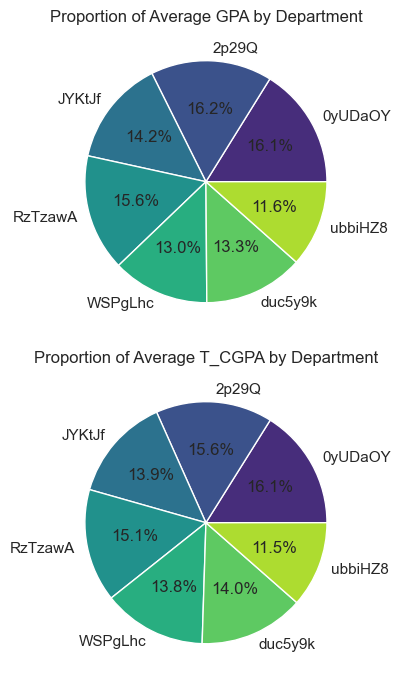

In [18]:
# Calculate average GPA and T_CGPA by Department
avg_gpa_cgpa = df.groupby('Dep_Code')[['GPA', 'T_CGPA']].mean().reset_index()

# Prepare data for pie charts
gpa_pie_data = avg_gpa_cgpa[['Dep_Code', 'GPA']].set_index('Dep_Code')
cgpa_pie_data = avg_gpa_cgpa[['Dep_Code', 'T_CGPA']].set_index('Dep_Code')

# Plot pie charts
plt.figure(figsize=(14, 7))

# Pie chart for Average GPA by Department
plt.subplot(2, 1, 1)
plt.pie(gpa_pie_data['GPA'], labels=gpa_pie_data.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(gpa_pie_data)))
plt.title('Proportion of Average GPA by Department')

# Pie chart for Average T_CGPA by Department
plt.subplot(2, 1, 2)
plt.pie(cgpa_pie_data['T_CGPA'], labels=cgpa_pie_data.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(cgpa_pie_data)))
plt.title('Proportion of Average T_CGPA by Department')
plt.savefig('Department_wise_Pie.svg', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

## <center>Performance by Year and Session<center>

These heatmaps visualize the average GPA and T_CGPA across different years and sessions.

1. **Average GPA by Year and Session**:
   - **Visualization**: This heatmap shows how the average GPA varies by year and session. 
   - **Insights**: The color gradient highlights performance trends, with annotations providing exact average values for better comparison.

2. **Average T_CGPA by Year and Session**:
   - **Visualization**: Similar to the GPA heatmap, this one displays the average T_CGPA across years and sessions.
   - **Insights**: It allows for comparison of cumulative performance trends over time and across sessions.

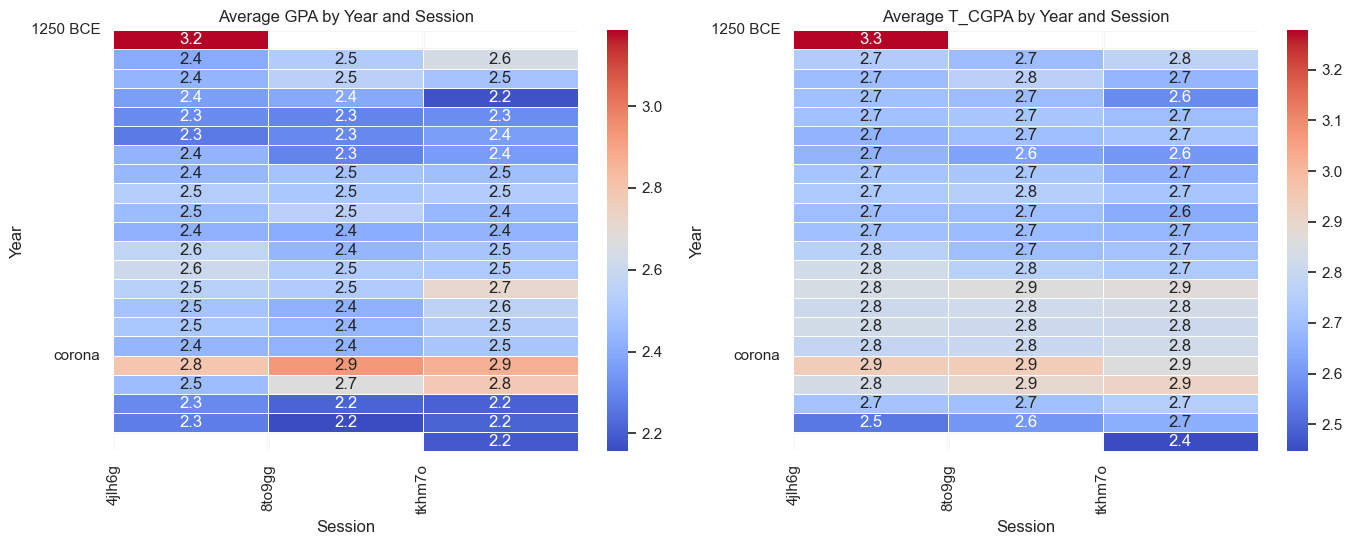

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame setup (assuming df is already defined)
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Pivot table for heatmap
gpa_pivot = df.pivot_table(index='Year', columns='Session', values='GPA', aggfunc='mean')
tcgpa_pivot = df.pivot_table(index='Year', columns='Session', values='T_CGPA', aggfunc='mean')

plt.figure(figsize=(14, 10))

# Helper function to create custom y-axis labels
def custom_labels(years):
    labels = {year: ("1250 BCE" if year == 2003 else "corona" if year == 2020 else "") for year in years}
    return [labels.get(year, "") for year in years]

# GPA Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(gpa_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average GPA by Year and Session')

# Set custom y-axis labels, show only 2003 and 2020
plt.yticks(ticks=range(len(gpa_pivot.index)), labels=custom_labels(gpa_pivot.index), rotation=0)
plt.xticks(ticks=range(len(gpa_pivot.columns)), labels=gpa_pivot.columns, rotation=90)

# T_CGPA Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(tcgpa_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average T_CGPA by Year and Session')

# Set custom y-axis labels, show only 2003 and 2020
plt.yticks(ticks=range(len(tcgpa_pivot.index)), labels=custom_labels(tcgpa_pivot.index), rotation=0)
plt.xticks(ticks=range(len(tcgpa_pivot.columns)), labels=tcgpa_pivot.columns, rotation=90)
plt.savefig('Performance_by_Year_and_Session.svg', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


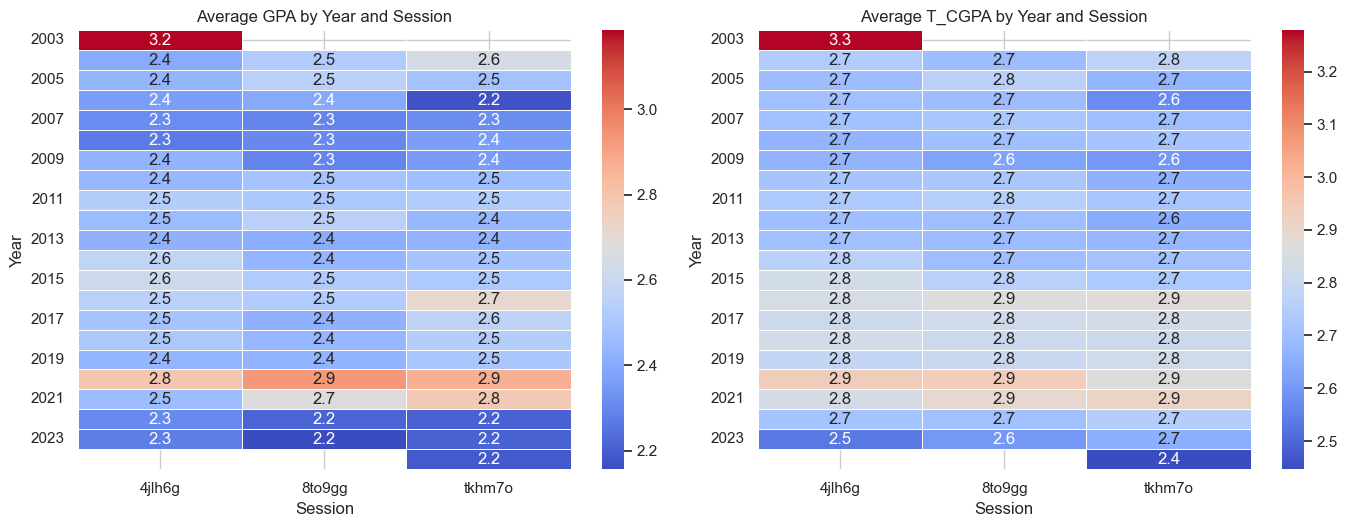

In [20]:
# Pivot table for heatmap
gpa_pivot = df.pivot_table(index='Year', columns='Session', values='GPA', aggfunc='mean')
tcgpa_pivot = df.pivot_table(index='Year', columns='Session', values='T_CGPA', aggfunc='mean')

plt.figure(figsize=(14, 10))

# GPA Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(gpa_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average GPA by Year and Session')

# T_CGPA Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(tcgpa_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average T_CGPA by Year and Session')

plt.tight_layout()
plt.show()

## <center>Advanced Statistical Analysis<center>

These plots illustrate the distribution of GPA and T_CGPA with both Kernel Density Estimation (KDE) and boxplots.

1. **GPA Distribution**:
   - **Histogram with KDE**: Displays the distribution of GPA scores with a density curve, highlighting the overall distribution pattern.
   - **Boxplot**: Overlaid on the histogram, it shows the spread of GPA values, including the interquartile range and outliers (beyond the 5th and 95th percentiles).

2. **T_CGPA Distribution**:
   - **Histogram with KDE**: Similar to the GPA plot, this histogram with a density curve represents the distribution of T_CGPA scores.
   - **Boxplot**: Provides a visual summary of the T_CGPA data spread, emphasizing the central tendency and variability.

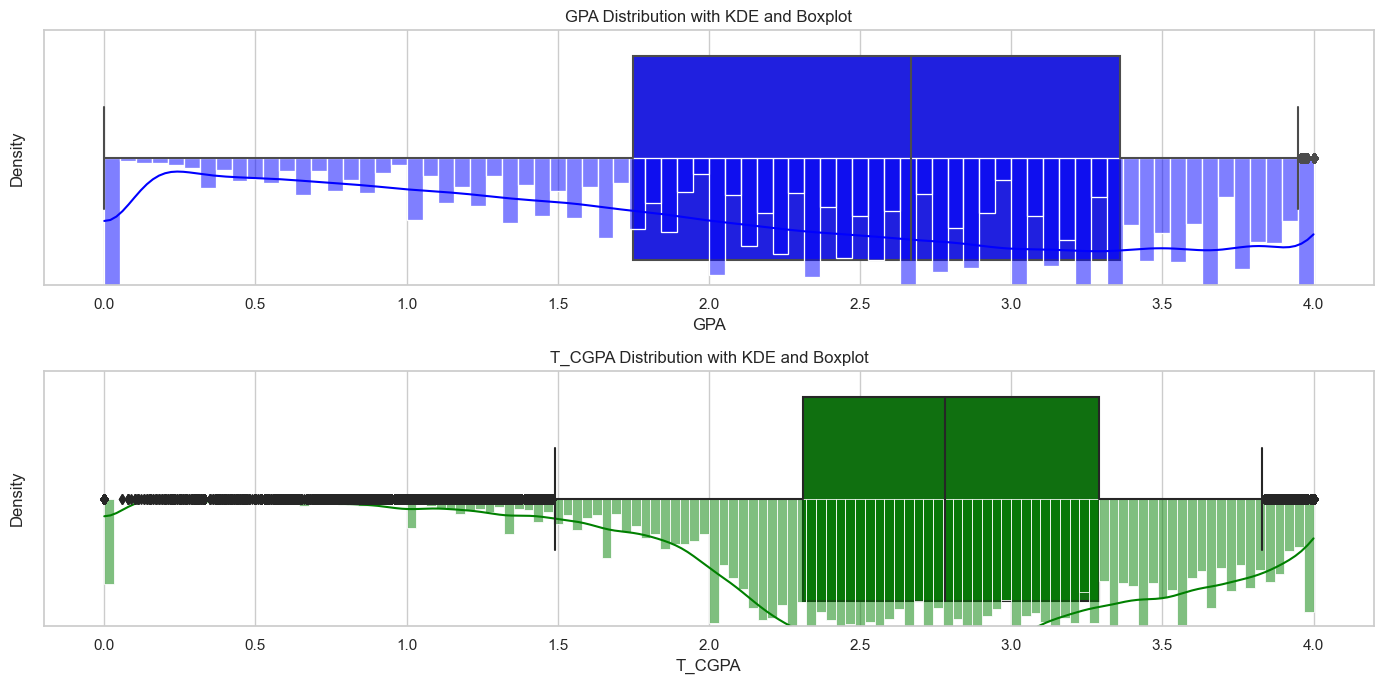

In [21]:
plt.figure(figsize=(14, 7))

# GPA Distribution with KDE and Boxplot
plt.subplot(2, 1, 1)
sns.histplot(df['GPA'], kde=True, color='blue', stat='density')
sns.boxplot(x=df['GPA'], color='blue', whis=[5, 95])
plt.title('GPA Distribution with KDE and Boxplot')
plt.xlabel('GPA')

# T_CGPA Distribution with KDE and Boxplot
plt.subplot(2, 1, 2)
sns.histplot(df['T_CGPA'], kde=True, color='green', stat='density')
sns.boxplot(x=df['T_CGPA'], color='green', whis=[5, 95])
plt.title('T_CGPA Distribution with KDE and Boxplot')
plt.xlabel('T_CGPA')
plt.savefig('Session_wise_Analysis.svg', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.savefig('Advanced_Statistical_Analysis.png', dpi=300)
plt.show()

## <center>Trend Analysis Over Sessions<center>

These line plots depict the average GPA and T_CGPA across different sessions.

1. **Average GPA by Session**:
   - **Visualization**: This line plot illustrates how the average GPA varies with different sessions, with data points marked for clarity.
   - **Insights**: It shows trends in GPA performance over sessions, helping to identify patterns or changes in academic achievement across sessions.

2. **Average T_CGPA by Session**:
   - **Visualization**: Similar to the GPA plot, this line chart represents the average T_CGPA for each session, with data points highlighted.
   - **Insights**: It provides a view of cumulative performance trends over sessions, revealing how overall academic progress evolves.

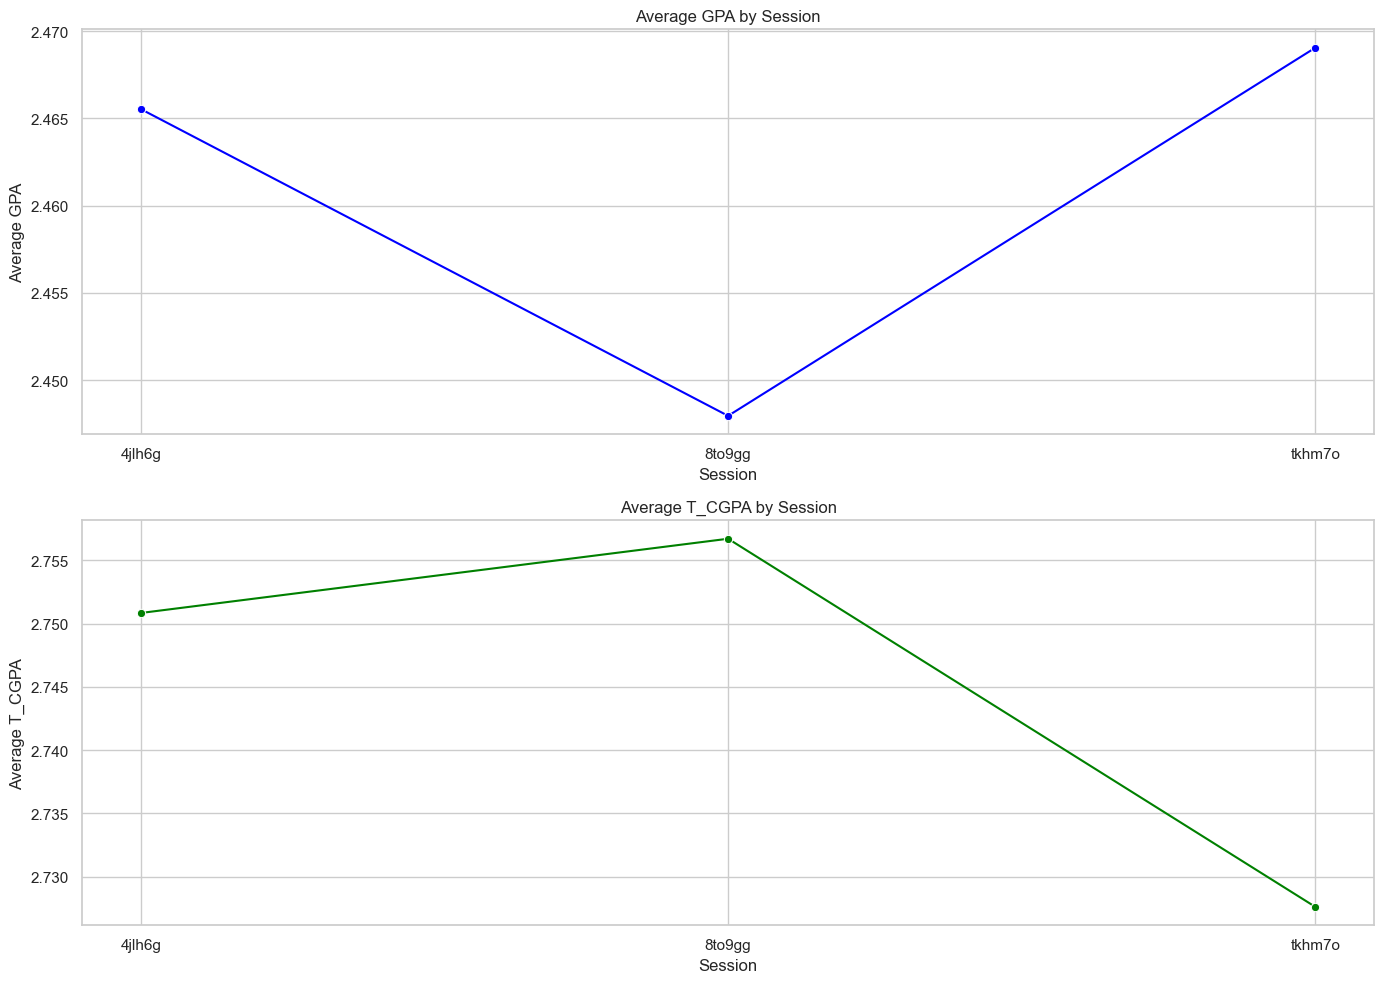

In [22]:
average_df = df.groupby('Session').agg({'GPA': 'mean', 'T_CGPA': 'mean'}).reset_index()

# Set the figure size
plt.figure(figsize=(14, 10))

# Average GPA by Session
plt.subplot(2, 1, 1)
sns.lineplot(x='Session', y='GPA', data=average_df, marker='o', color='blue')
plt.title('Average GPA by Session')
plt.xlabel('Session')
plt.ylabel('Average GPA')

# Average T_CGPA by Session
plt.subplot(2, 1, 2)
sns.lineplot(x='Session', y='T_CGPA', data=average_df, marker='o', color='green')
plt.title('Average T_CGPA by Session')
plt.xlabel('Session')
plt.ylabel('Average T_CGPA')
plt.savefig('Trend_Analysis_Over_Sessions.png', dpi=300)

plt.tight_layout()
plt.show()

## <center>Performance Analysis by Year and Department<center>

These line plots visualize the average GPA and T_CGPA over the years for different departments.

1. **Yearly GPA by Department**:
   - **Visualization**: The line plot displays the average GPA for each department across different years, using distinct colors for each department.
   - **Insights**: It helps to identify trends and compare performance changes in GPA across departments over time.

2. **Yearly T_CGPA by Department**:
   - **Visualization**: This plot shows the average T_CGPA for various departments over the years, with each department represented by a different color.
   - **Insights**: It provides a view of cumulative performance trends across departments, highlighting how T_CGPA varies over time.

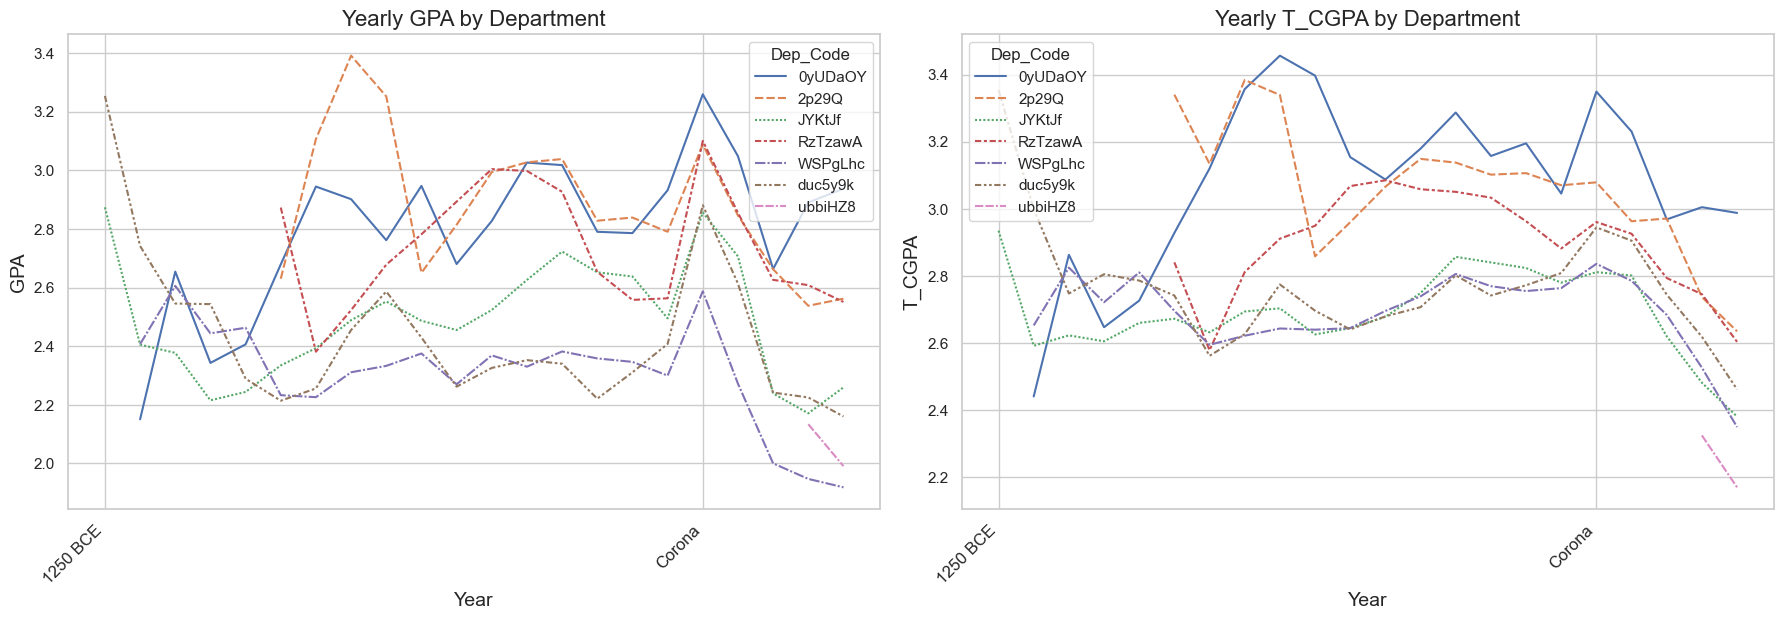

In [37]:
# Pivot tables for yearly analysis
gpa_year_dept = df.pivot_table(index='Year', columns='Dep_Code', values='GPA', aggfunc='mean')
tcgpa_year_dept = df.pivot_table(index='Year', columns='Dep_Code', values='T_CGPA', aggfunc='mean')

plt.figure(figsize=(18, 12))

# Helper function to create custom x-axis labels
def custom_labels(years):
    labels = {2003: "1250 BCE", 2020: "Corona"}
    return [labels.get(year, '') for year in years]

# Define years to display
def filter_xticks(years):
    return [year for year in years if year in [2003, 2020]]

# GPA by Year and Department
plt.subplot(2, 2, 1)
sns.lineplot(data=gpa_year_dept)
plt.title('Yearly GPA by Department', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GPA', fontsize=14)
years = gpa_year_dept.index
plt.xticks(ticks=filter_xticks(years), labels=custom_labels(filter_xticks(years)), fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right

# T_CGPA by Year and Department
plt.subplot(2, 2, 2)
sns.lineplot(data=tcgpa_year_dept)
plt.title('Yearly T_CGPA by Department', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('T_CGPA', fontsize=14)
years = tcgpa_year_dept.index
plt.xticks(ticks=filter_xticks(years), labels=custom_labels(filter_xticks(years)), fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.1)  # Adjust spacing between subplots

# Save and show the plot
plt.savefig('Performance_by_Year_and_Department.png', dpi=300)
plt.show()

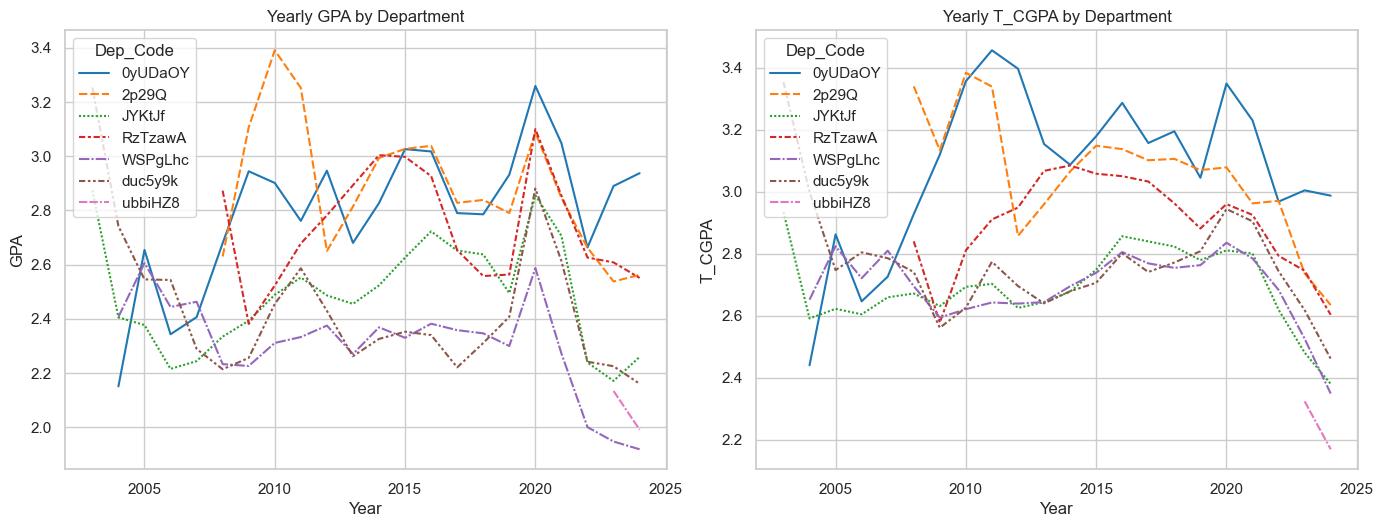

In [24]:
# Pivot tables for yearly analysis
gpa_year_dept = df.pivot_table(index='Year', columns='Dep_Code', values='GPA', aggfunc='mean')
tcgpa_year_dept = df.pivot_table(index='Year', columns='Dep_Code', values='T_CGPA', aggfunc='mean')

plt.figure(figsize=(14, 10))

# GPA by Year and Department
plt.subplot(2, 2, 1)
sns.lineplot(data=gpa_year_dept, palette='tab10')
plt.title('Yearly GPA by Department')
plt.xlabel('Year')
plt.ylabel('GPA')

# T_CGPA by Year and Department
plt.subplot(2, 2, 2)
sns.lineplot(data=tcgpa_year_dept, palette='tab10')
plt.title('Yearly T_CGPA by Department')
plt.xlabel('Year')
plt.ylabel('T_CGPA')

plt.tight_layout()
plt.show()

## <center>What's the relationship between GPA volatility and overall performance?<center>
    
 - GPA volatility refers to the fluctuations or variability in a student's Grade Point Average (GPA) over time. It measures how much a student's GPA changes from one period (e.g., semester, year) to another. High volatility indicates that a student's GPA fluctuates significantly, while low volatility suggests that the GPA is relatively stable.

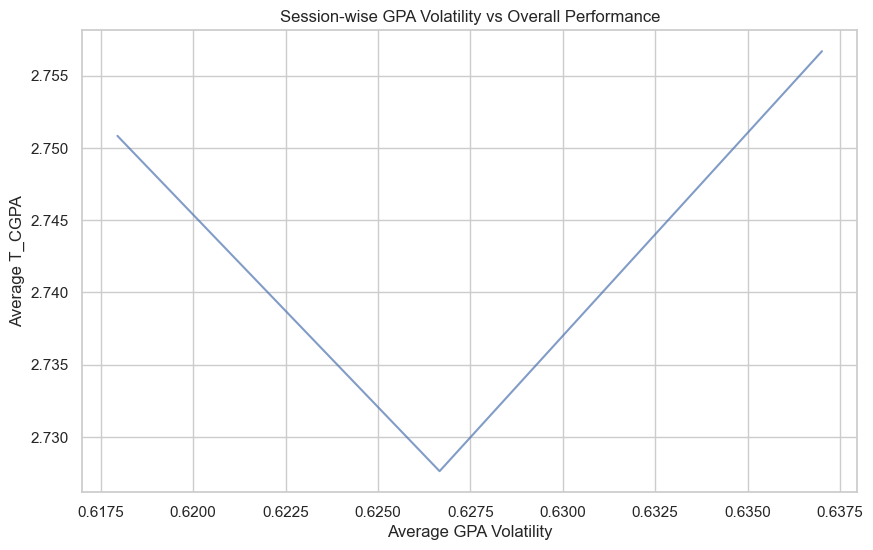

In [25]:
df['GPA_Volatility'] = df.groupby(['ID', 'Session'])['GPA'].transform(lambda x: x.std())

# Calculate the average T_CGPA for each student within each session
df['Average_T_CGPA'] = df.groupby(['ID', 'Session'])['T_CGPA'].transform('mean')

# Aggregate session-wise data
session_data = df.groupby('Session').agg({
    'GPA_Volatility': 'mean',
    'Average_T_CGPA': 'mean'
}).reset_index()

session_data.rename(columns={'GPA_Volatility': 'Avg_GPA_Volatility', 'Average_T_CGPA': 'Avg_T_CGPA'}, inplace=True)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Avg_GPA_Volatility', y='Avg_T_CGPA', data=session_data, alpha=0.7)
plt.title('Session-wise GPA Volatility vs Overall Performance')
plt.xlabel('Average GPA Volatility')
plt.ylabel('Average T_CGPA')
plt.savefig('GPA_volatility_and_overall_performance.svg', dpi=300, bbox_inches='tight')
plt.show()

## <center>Is there a "sophomore slump"?<center>

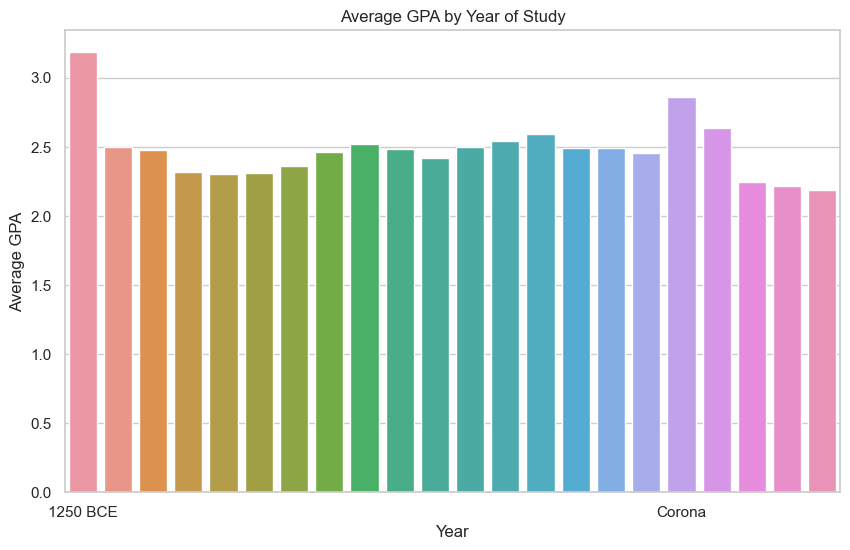

In [26]:
year_performance = df.groupby('Year')['GPA'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='GPA', data=year_performance)

# Get current x-axis ticks positions
current_ticks = plt.xticks()[0]

# Define new labels, with empty strings for unwanted labels
new_labels = ['1250 BCE' if year == 2003 else 'Corona' if year == 2020 else '' for year in year_performance['Year']]

# Apply the new labels
plt.xticks(ticks=current_ticks, labels=new_labels)

plt.title('Average GPA by Year of Study')
plt.xlabel('Year')
plt.ylabel('Average GPA')
plt.savefig('Is_there_a_sophomore_slump_gpa.svg', dpi=300, bbox_inches='tight')
plt.show()

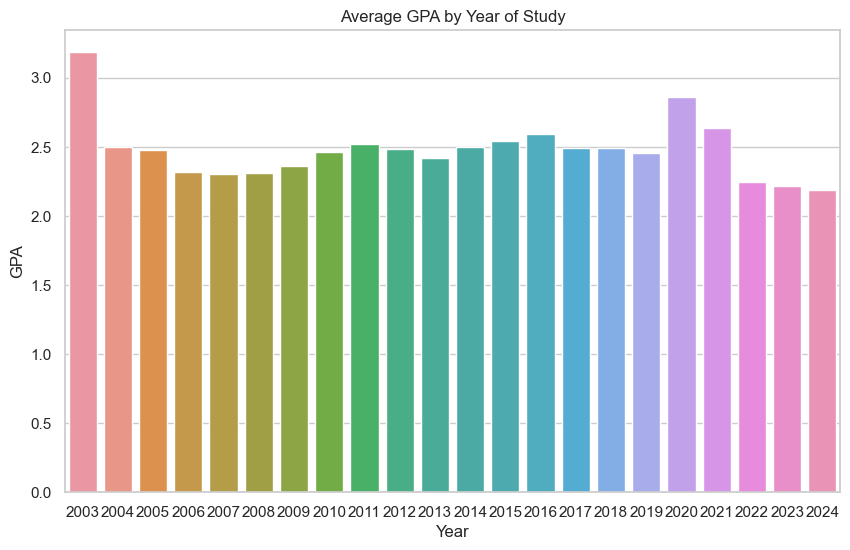

In [27]:
year_performance = df.groupby('Year')['GPA'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='GPA', data=year_performance)
plt.title('Average GPA by Year of Study')
plt.show()

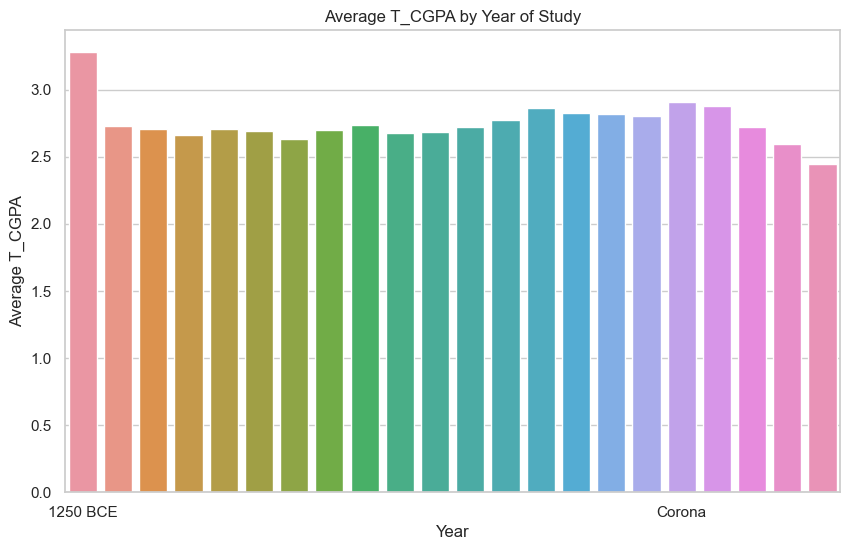

In [28]:
year_performance = df.groupby('Year')['T_CGPA'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='T_CGPA', data=year_performance)

# Get current x-axis ticks positions
current_ticks = plt.xticks()[0]

# Define new labels, with empty strings for unwanted labels
new_labels = ['1250 BCE' if year == 2003 else 'Corona' if year == 2020 else '' for year in year_performance['Year']]

# Apply the new labels
plt.xticks(ticks=current_ticks, labels=new_labels)

plt.title('Average T_CGPA by Year of Study')
plt.xlabel('Year')
plt.ylabel('Average T_CGPA')
plt.savefig('Is_there_a_sophomore_slump_cgpa.svg', dpi=300, bbox_inches='tight')
plt.show()

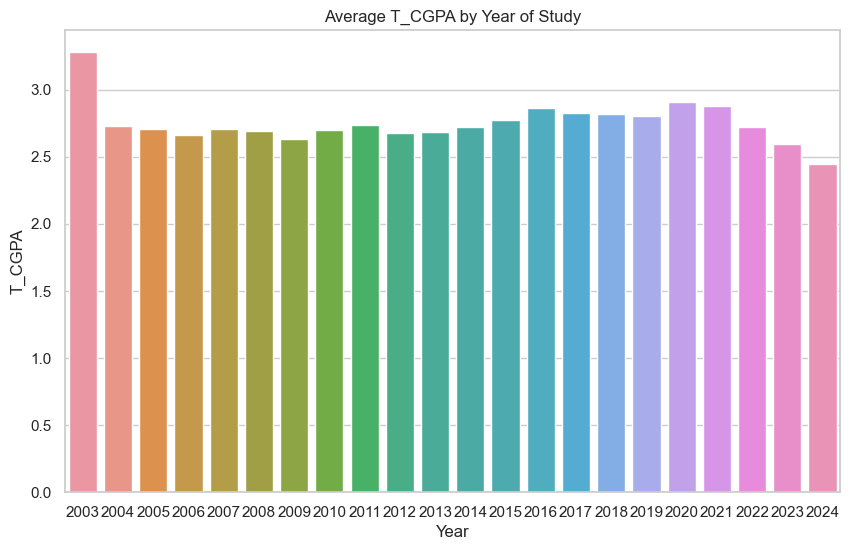

In [29]:
year_performance = df.groupby('Year')['T_CGPA'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='T_CGPA', data=year_performance)
plt.title('Average T_CGPA by Year of Study')
plt.show()

## <center>How does GPA trajectory differ for high vs low performers?<center>
- GPA Trajectory: The pattern or trend of a student's GPA as they progress through different academic periods (e.g., semesters, academic years). It shows how GPA changes over time

**Interpretation**

 Initial GPA vs. GPA Trajectory:

 - Initial GPA: The starting academic performance of a student.
 - GPA Trajectory: The average rate of change in GPA over time.

Expected Insights:

 - Positive Correlation: If high initial GPAs are associated with a positive GPA trajectory (i.e., GPA increases over time), it may indicate that students who start with a higher GPA continue to perform well.
 - Negative or No Correlation: If there's little to no relationship, it could suggest that initial GPA does not predict future GPA changes, and other factors might be influencing academic progress.

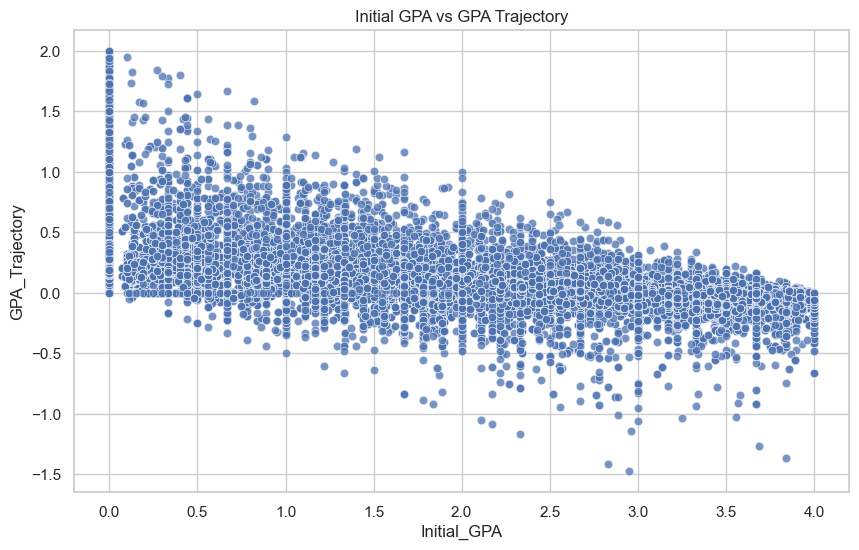

In [30]:
df['Initial_GPA'] = df.groupby('ID')['GPA'].transform('first')
df['GPA_Trajectory'] = df.groupby('ID')['GPA'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / len(x))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Initial_GPA', y='GPA_Trajectory', data=df, alpha=0.5)
plt.title('Initial GPA vs GPA Trajectory')
plt.savefig('GPA_trajectory.png', dpi=300)
plt.show()

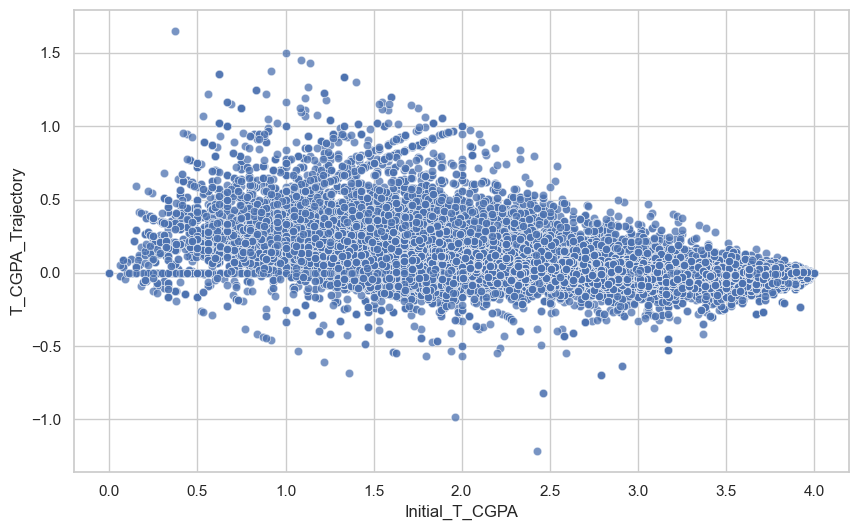

In [31]:
df['Initial_T_CGPA'] = df.groupby('ID')['T_CGPA'].transform('first')
df['T_CGPA_Trajectory'] = df.groupby('ID')['T_CGPA'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / len(x))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Initial_T_CGPA', y='T_CGPA_Trajectory', data=df, alpha=0.5)
plt.savefig('T_CGPA_trajectory.png', dpi=300)
plt.show()

## <center> Is there a correlation between GPA and course load<center>

This box plot examines the relationship between the number of courses taken per session and GPA.

- **Visualization**: The plot displays GPA distributions for different levels of course load (number of courses per session), with the course load shown on the x-axis and GPA on the y-axis.
- **Insights**: By analyzing this plot, you can understand how varying course loads impact GPA. It helps to identify if there is a correlation between the number of courses a student takes and their academic performance, potentially revealing patterns of performance related to course workload.

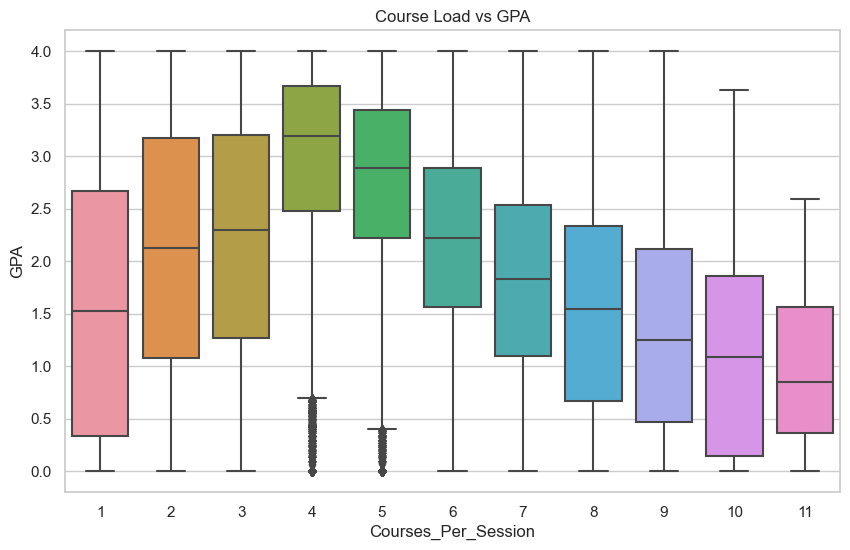

In [32]:
df['Courses_Per_Session'] = df.groupby(['ID', 'Session']).transform('size')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Courses_Per_Session', y='GPA', data=df)
plt.title('Course Load vs GPA')
plt.savefig('Course_Load_vs_GPA.svg', dpi=300, bbox_inches='tight')
plt.show()

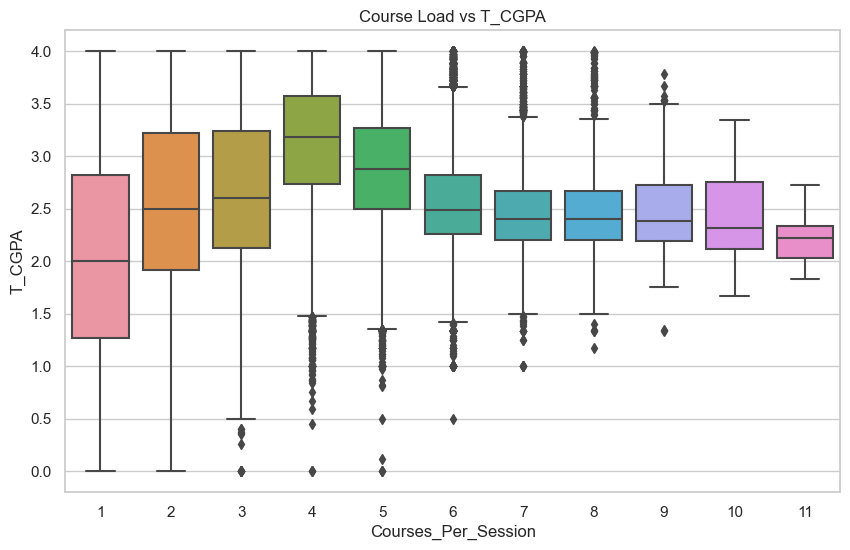

In [33]:
df['Courses_Per_Session'] = df.groupby(['ID', 'Session']).transform('size')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Courses_Per_Session', y='T_CGPA', data=df)
plt.title('Course Load vs T_CGPA')
plt.savefig('Course_Load_vs_T_CGPA.svg', dpi=300, bbox_inches='tight')
plt.show()

## <center>What's the distribution of "comeback stories"?<center>

This histogram displays the distribution of GPA improvements for each student.

- **GPA Improvement Calculation**:
  - `df['GPA_Improvement']` is computed as the difference between the maximum and minimum GPA for each student (`ID`). This value represents how much a student's GPA has improved (or declined) over their academic history.

- **Visualization**:
  - The histogram with a Kernel Density Estimate (KDE) shows how these GPA improvements are distributed across all students.
  - The x-axis represents the range of GPA improvements, while the y-axis shows the frequency or density of students within each range of improvement.

- **Insights**:
  - The plot reveals the common patterns of GPA improvement across students. It helps to identify whether most students have minimal improvement, significant improvement, or if there is a wide range of improvements.
  - Peaks in the histogram indicate common levels of GPA improvement, while the spread shows the variability in how students' GPAs have changed over time.

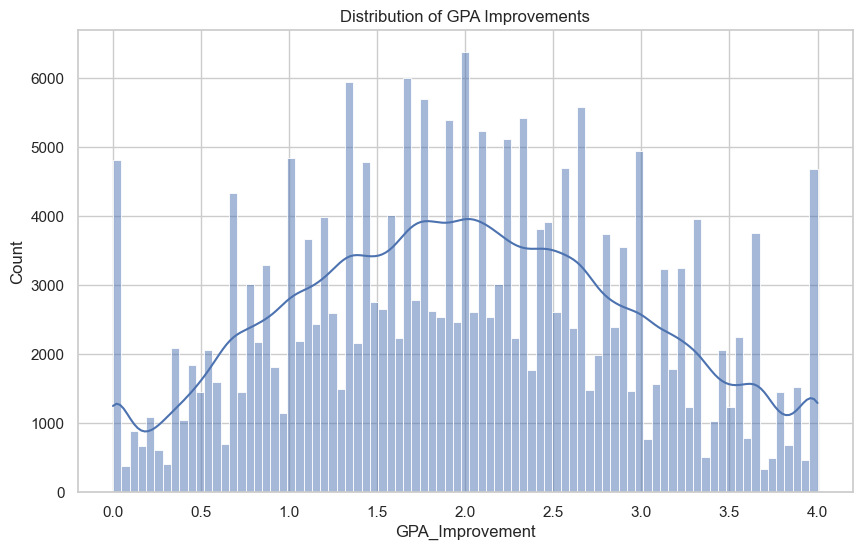

In [34]:
df['GPA_Improvement'] = df.groupby('ID')['GPA'].transform(lambda x: x.max() - x.min())
plt.figure(figsize=(10, 6))
sns.histplot(df['GPA_Improvement'], kde=True)
plt.title('Distribution of GPA Improvements')
plt.savefig('Comeback_GPA.svg', dpi=300, bbox_inches='tight')
plt.show()

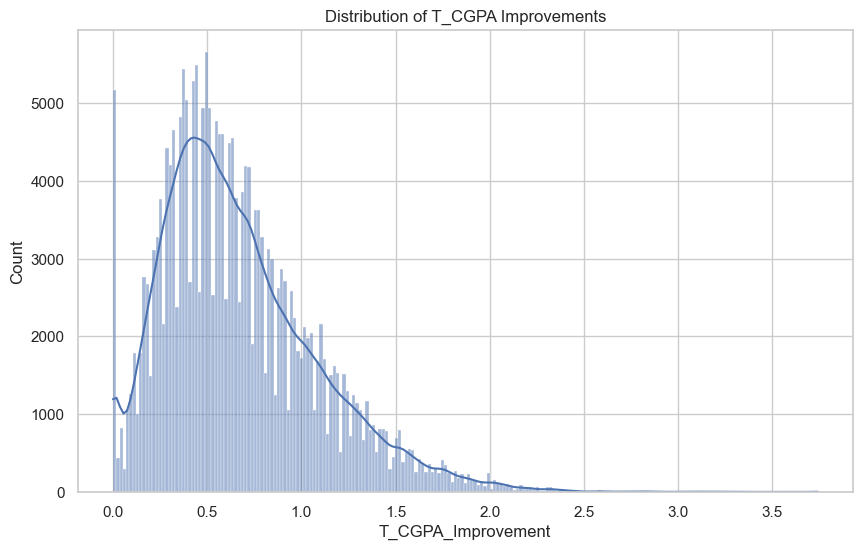

In [35]:
df['T_CGPA_Improvement'] = df.groupby('ID')['T_CGPA'].transform(lambda x: x.max() - x.min())
plt.figure(figsize=(10, 6))
sns.histplot(df['T_CGPA_Improvement'], kde=True)
plt.title('Distribution of T_CGPA Improvements')
plt.savefig('Comeback_T_CGPA.svg', dpi=300, bbox_inches='tight')
plt.show()